# Εξόρυξη Δεδομένων και Αλγόριθμοι Μάθησης Εξαμηνιαίο Project 2023-24

<hr>

### Μέλη Ομάδας
Λογοθέτης Δημήτριος <br/>
1047106 <br/>
1047106@ac.upatras.gr <br/>

Ζαχουλίτης Κωνσταντίνος Γεώργιος <br/>
1072578 <br/>
up1072578@ac.upatras.gr

## Περιβάλλον Υλοποίησης:

Επεξεργαστής: AMD 64-bit <br>
Γλώσσα Προγραμματισμού: Python 3.12 <br>
IDE: PyCharm Professional <br>
Βιβλιοθήκες: NumPy, Pandas, Matplotlib <br>
Διαδικασία Εγκατάστασης Βιβλιοθηκών: pip install pandas matplotlib numpy <br>

In [92]:
import pip
import warnings
def check_import(libs_list):
    for library in libs_list:
        try:
            __import__(library)
        except:
            print(f"{library} is not imported")
            pip.main(['install', library])
        else:
            print(f"{library} is imported")
libraries = ["numpy","matplotlib","pandas",'scikit-learn','nltk', 'torch', 'pgmpy']
check_import(libraries)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


numpy is imported
matplotlib is imported
pandas is imported
scikit-learn is not imported


Requirement already satisfied: scikit-learn in c:\codetools\python\lib\site-packages (1.4.1.post1)

Requirement already satisfied: numpy<2.0,>=1.19.5 in c:\codetools\python\lib\site-packages (from scikit-learn) (1.26.4)

Requirement already satisfied: scipy>=1.6.0 in c:\codetools\python\lib\site-packages (from scikit-learn) (1.12.0)

Requirement already satisfied: joblib>=1.2.0 in c:\codetools\python\lib\site-packages (from scikit-learn) (1.3.2)

Requirement already satisfied: threadpoolctl>=2.0.0 in c:\codetools\python\lib\site-packages (from scikit-learn) (3.3.0)

nltk is imported
torch is imported
pgmpy is imported


## Ερώτημα 1 - Πρώτη ανάλυση του συνόλου δεδομένων και κατάλληλες γραφικές παραστάσεις

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import os

# script_directory = os.path.dirname(os.path.abspath(__file__))
CSV_PATH = os.path.join('harth')
csvs = os.listdir(CSV_PATH)

df6 = pd.read_csv(CSV_PATH + "/S008.csv")
#print(df6)
df8 = pd.read_csv(CSV_PATH + "/S009.csv")
df9 = pd.read_csv(CSV_PATH + "/S012.csv")

In [94]:
NaNs_df6 =  df6.isnull().sum().sort_values(ascending=False)
print(f'Df6 NaNs: {NaNs_df6}')
NaNs_df8 =  df6.isnull().sum().sort_values(ascending=False)
print(f'Df6 NaNs: {NaNs_df8}')
NaNs_df9 =  df9.isnull().sum().sort_values(ascending=False)
print(f'Df6 NaNs: {NaNs_df9}')

Df6 NaNs: timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
Df6 NaNs: timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
Df6 NaNs: timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64


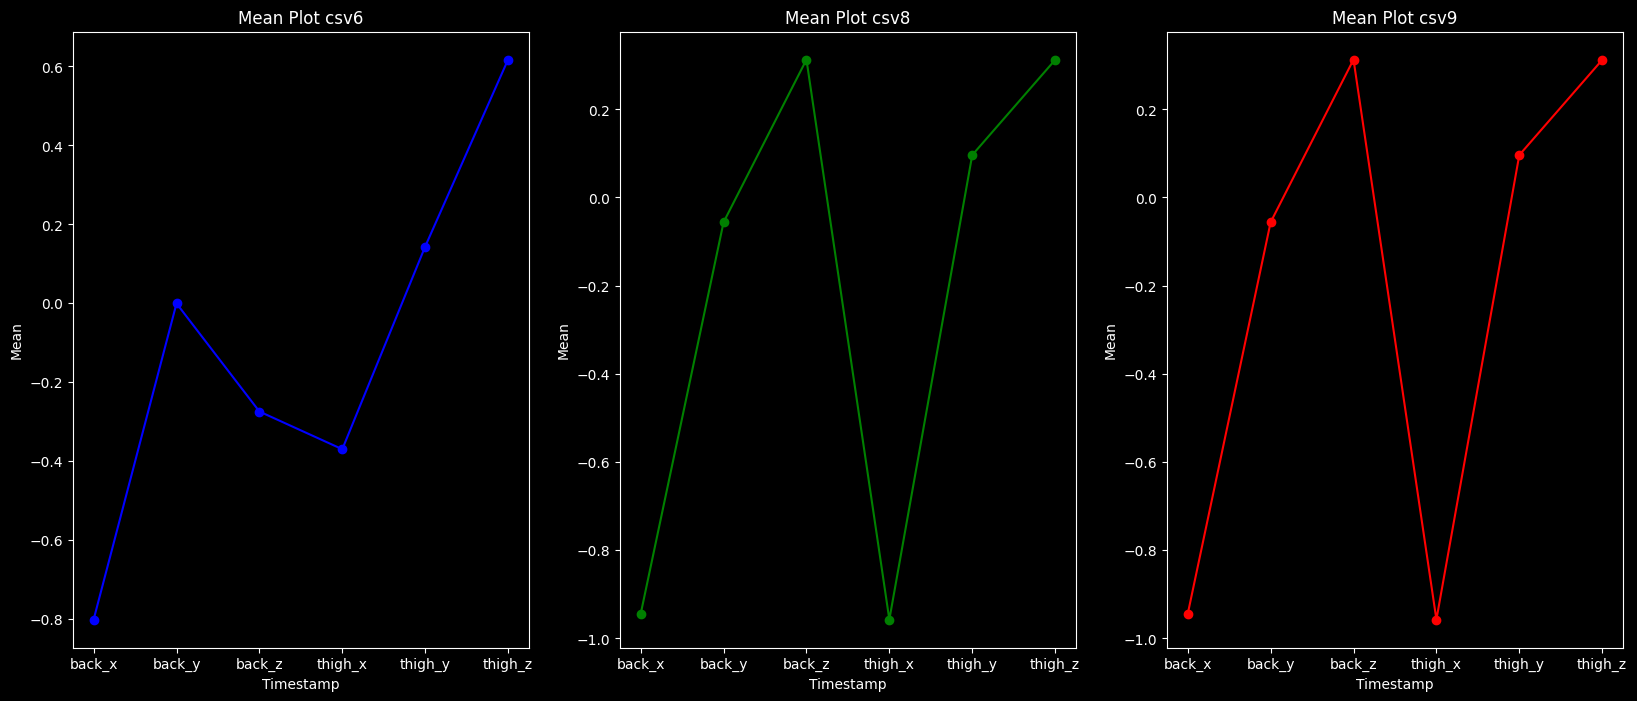

In [7]:
import numpy as np

plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    mean_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        mean = np.mean(df[i], axis=0)
        mean_values.append(mean)

    plt.subplot(1, 3, count)
    plt.plot(column_names, mean_values, marker='o', linestyle='-', color=colours[count-1], label='Mean')
    plt.xlabel('Timestamp')
    plt.ylabel('Mean')
    plt.title(f'Mean Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()


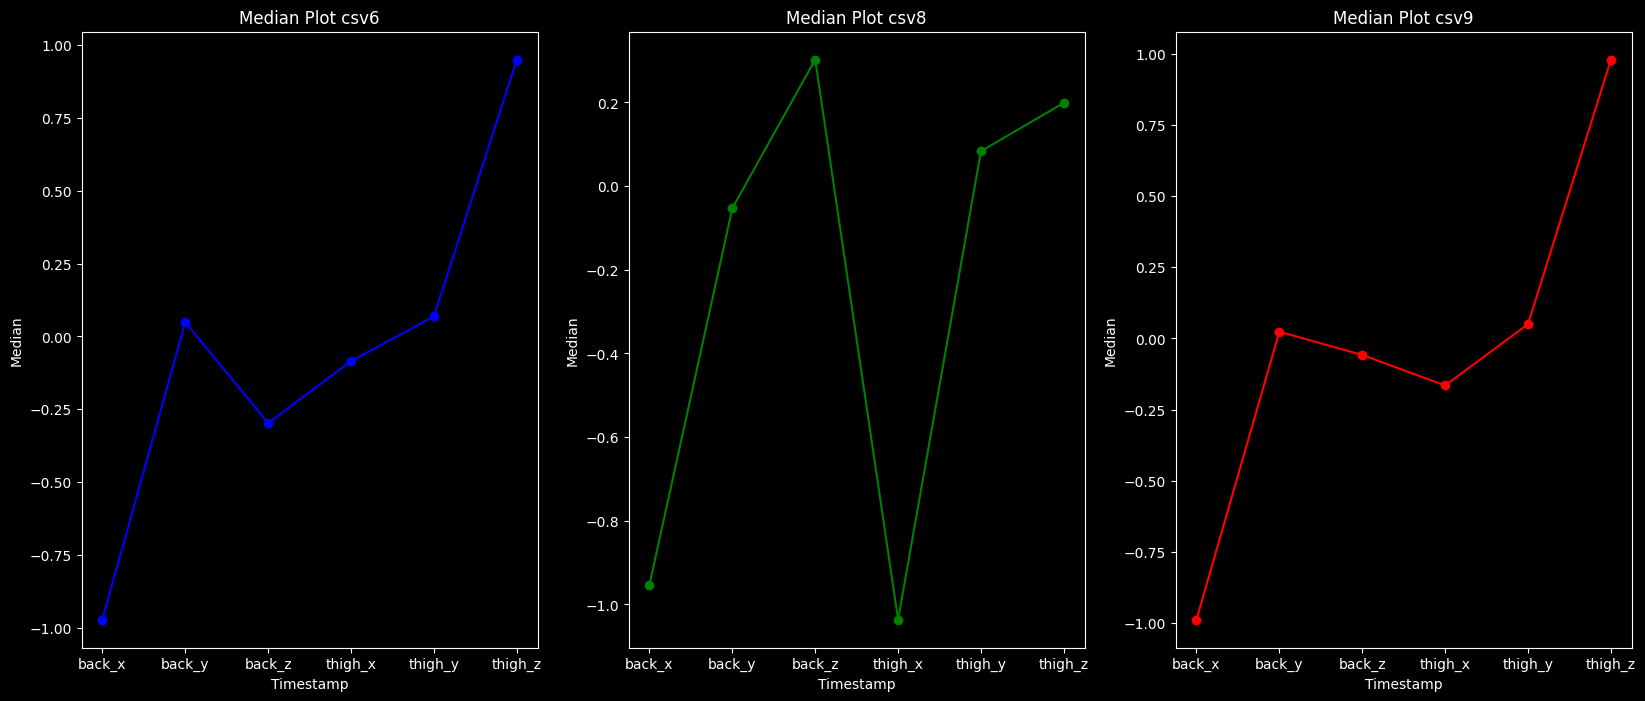

In [96]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    median_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        median = np.median(df[i], axis=0)
        median_values.append(median)

    plt.subplot(1, 3, count)
    plt.plot(column_names, median_values, marker='o', linestyle='-', color=colours[count-1], label='median')
    plt.xlabel('Timestamp')
    plt.ylabel('Median')
    plt.title(f'Median Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()

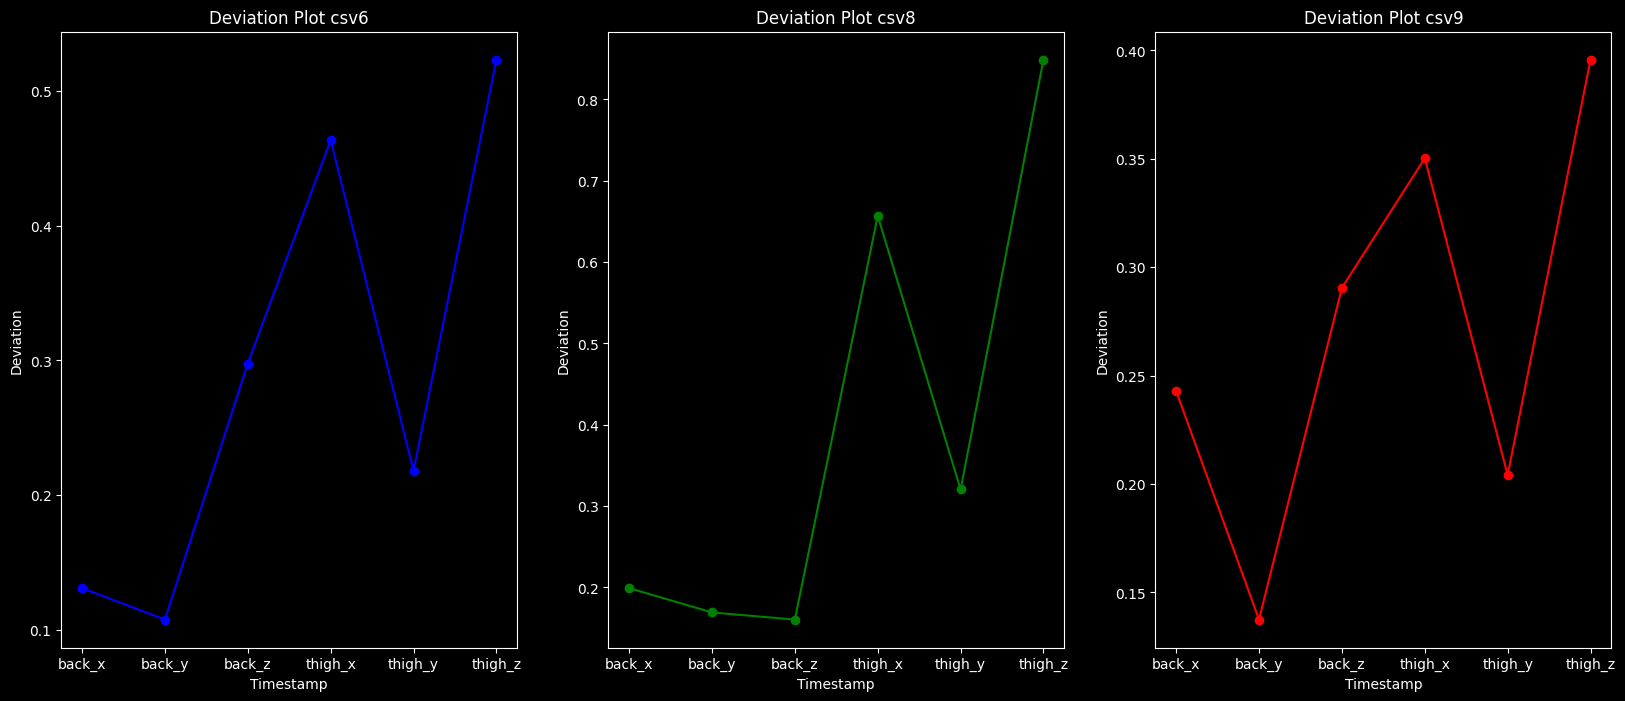

In [97]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    std_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        std = np.std(df[i], axis=0)  # Calculate standard deviation
        std_values.append(std)

    plt.subplot(1, 3, count)
    plt.plot(column_names, std_values, marker='o', linestyle='-', color=colours[count-1], label='Deviation')
    plt.xlabel('Timestamp')
    plt.ylabel('Deviation')
    plt.title(f'Deviation Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()


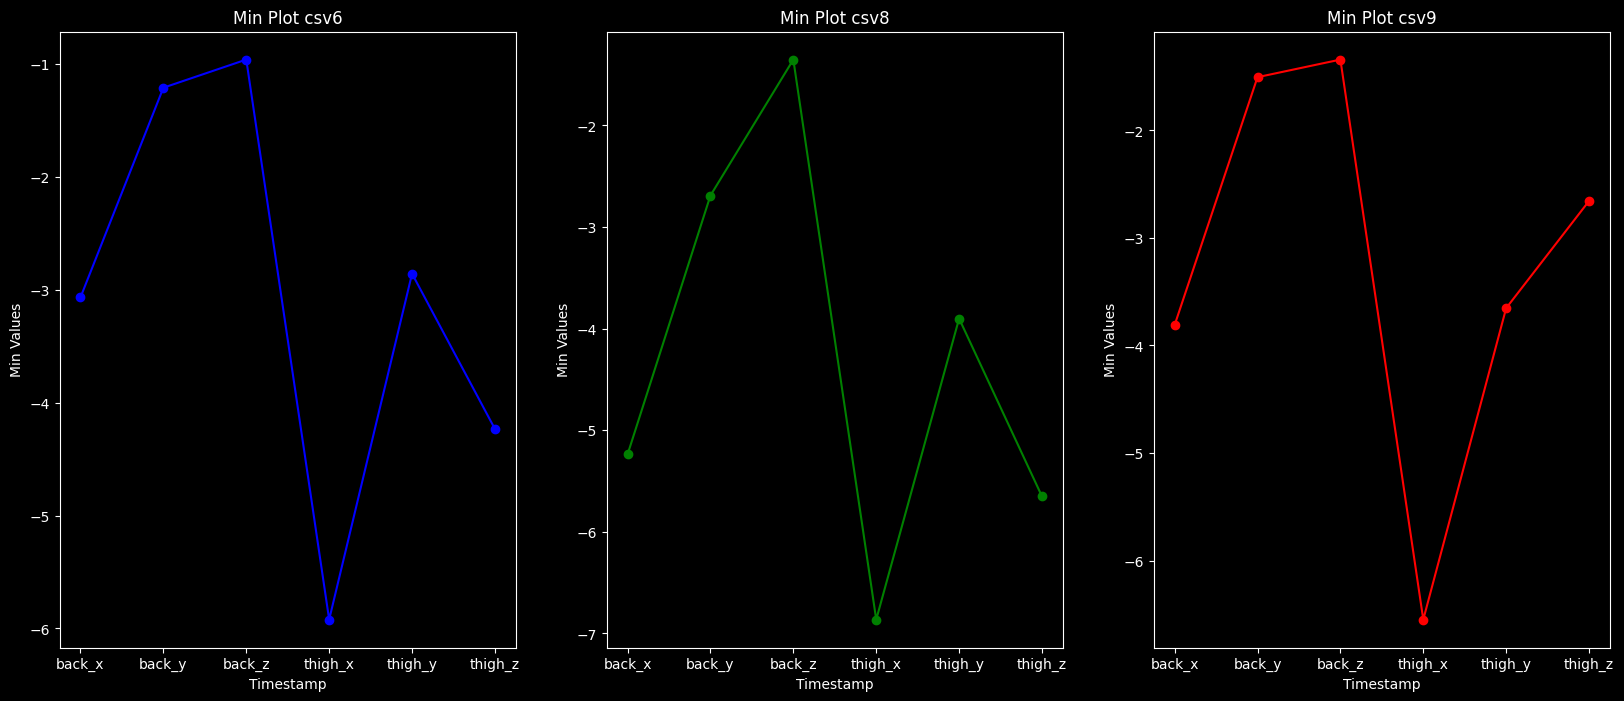

In [98]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    min_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        min = np.min(df[i], axis=0)
        min_values.append(min)

    plt.subplot(1, 3, count)
    plt.plot(column_names, min_values, marker='o', linestyle='-', color=colours[count-1], label='Min')
    plt.xlabel('Timestamp')
    plt.ylabel('Min Values')
    plt.title(f'Min Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()

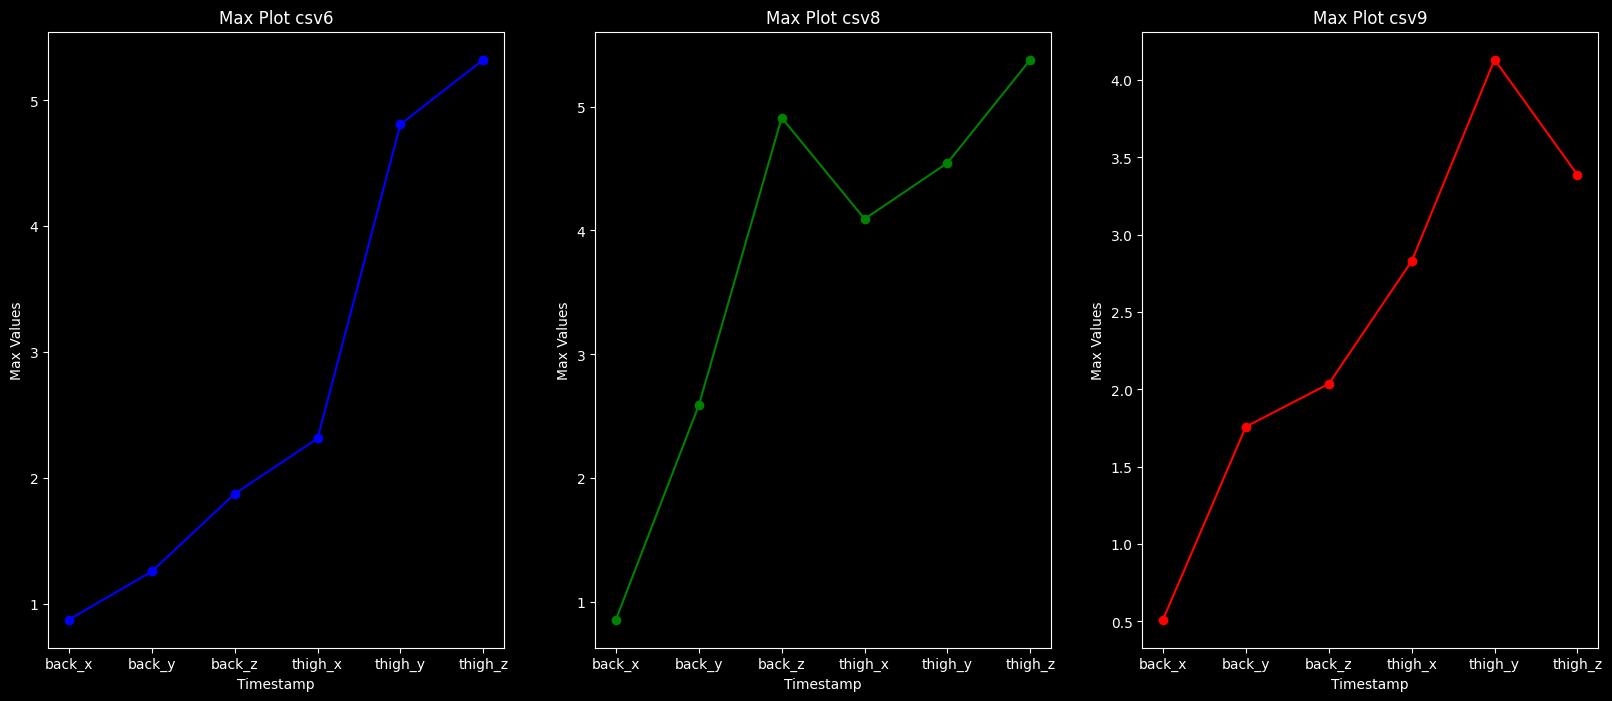

In [99]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    max_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        max = np.max(df[i], axis=0)
        max_values.append(max)

    plt.subplot(1, 3, count)
    plt.plot(column_names, max_values, marker='o', linestyle='-', color=colours[count-1], label='Max')
    plt.xlabel('Timestamp')
    plt.ylabel('Max Values')
    plt.title(f'Max Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()

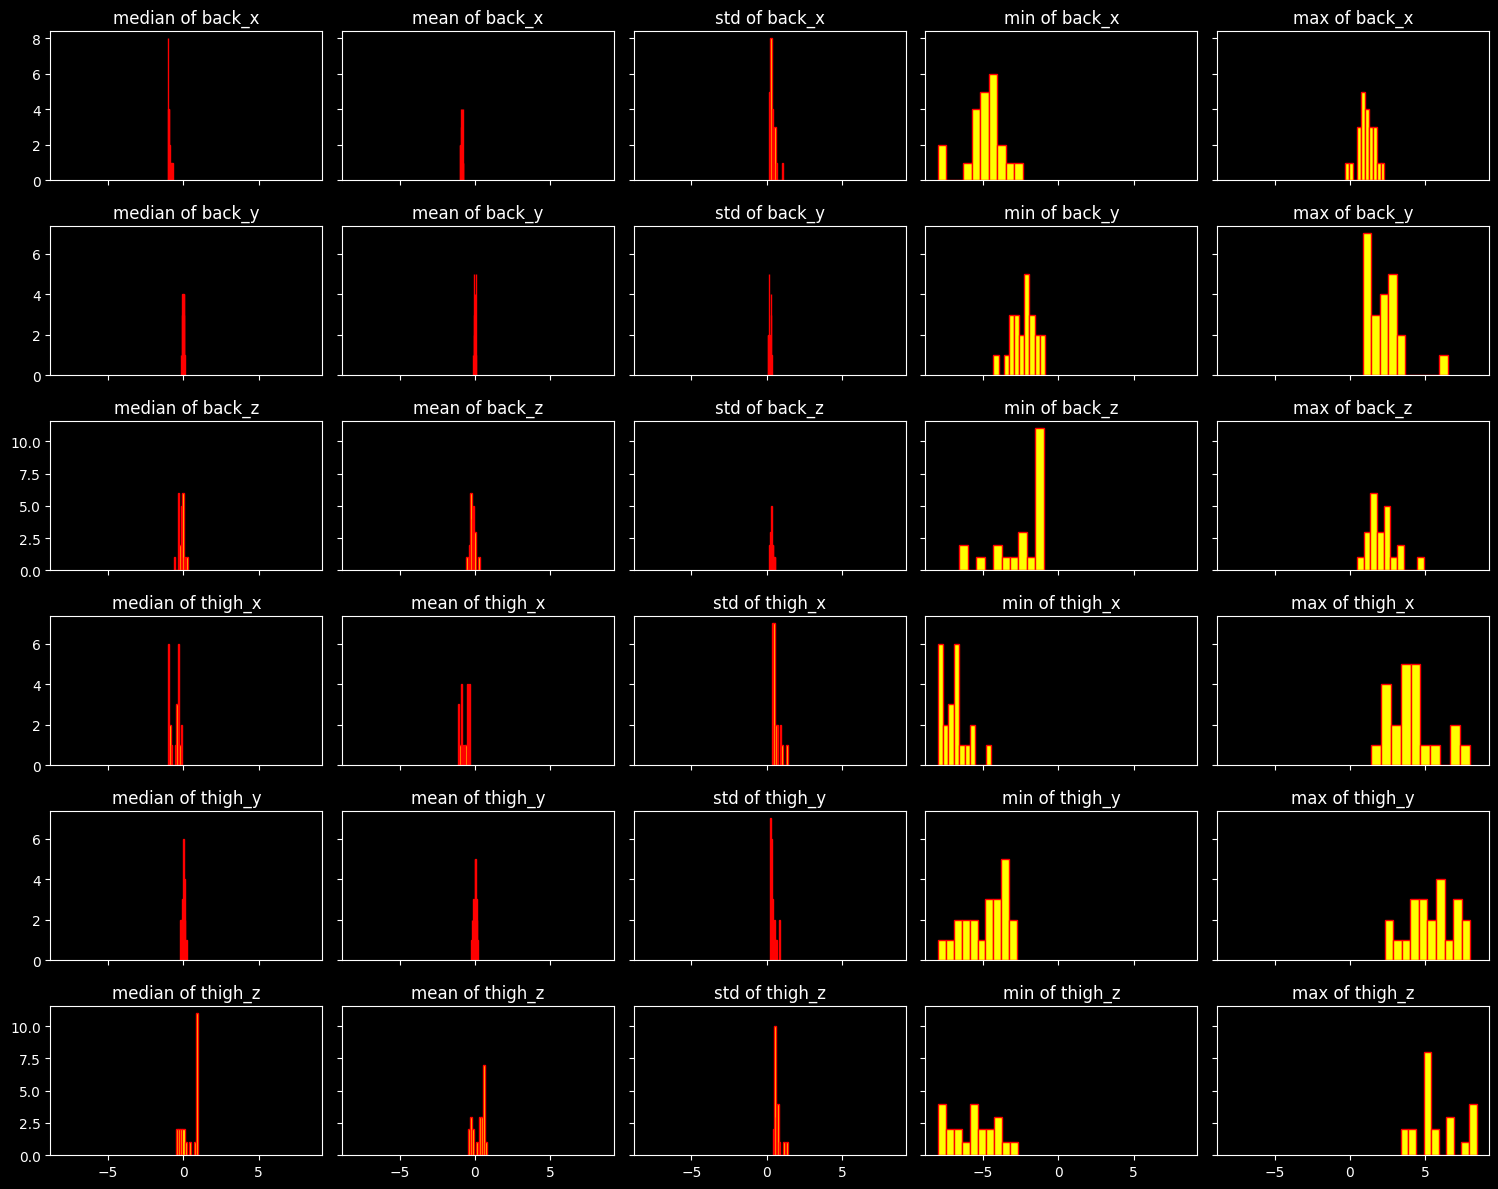

In [100]:
functions = [np.median,np.mean,np.std, np.min, np.max]
fig, axs = plt.subplots(6, 5, figsize=(15, 12), sharex=True, sharey='row')

for i, column_name in enumerate(column_names):
    for j, statistic_fun in enumerate(functions):
        plot_list = []
        for index, file in enumerate(csvs):
            df = pd.read_csv(CSV_PATH + f"/{file}")
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            plot_list.append(statistic_fun(df[column_name]))
        axs[i, j].hist(plot_list,color='yellow', edgecolor='red') #, alpha=0.5, bins=22, 
        axs[i, j].set_title(f'{statistic_fun.__name__} of {column_name}')
        
plt.tight_layout()
plt.show()

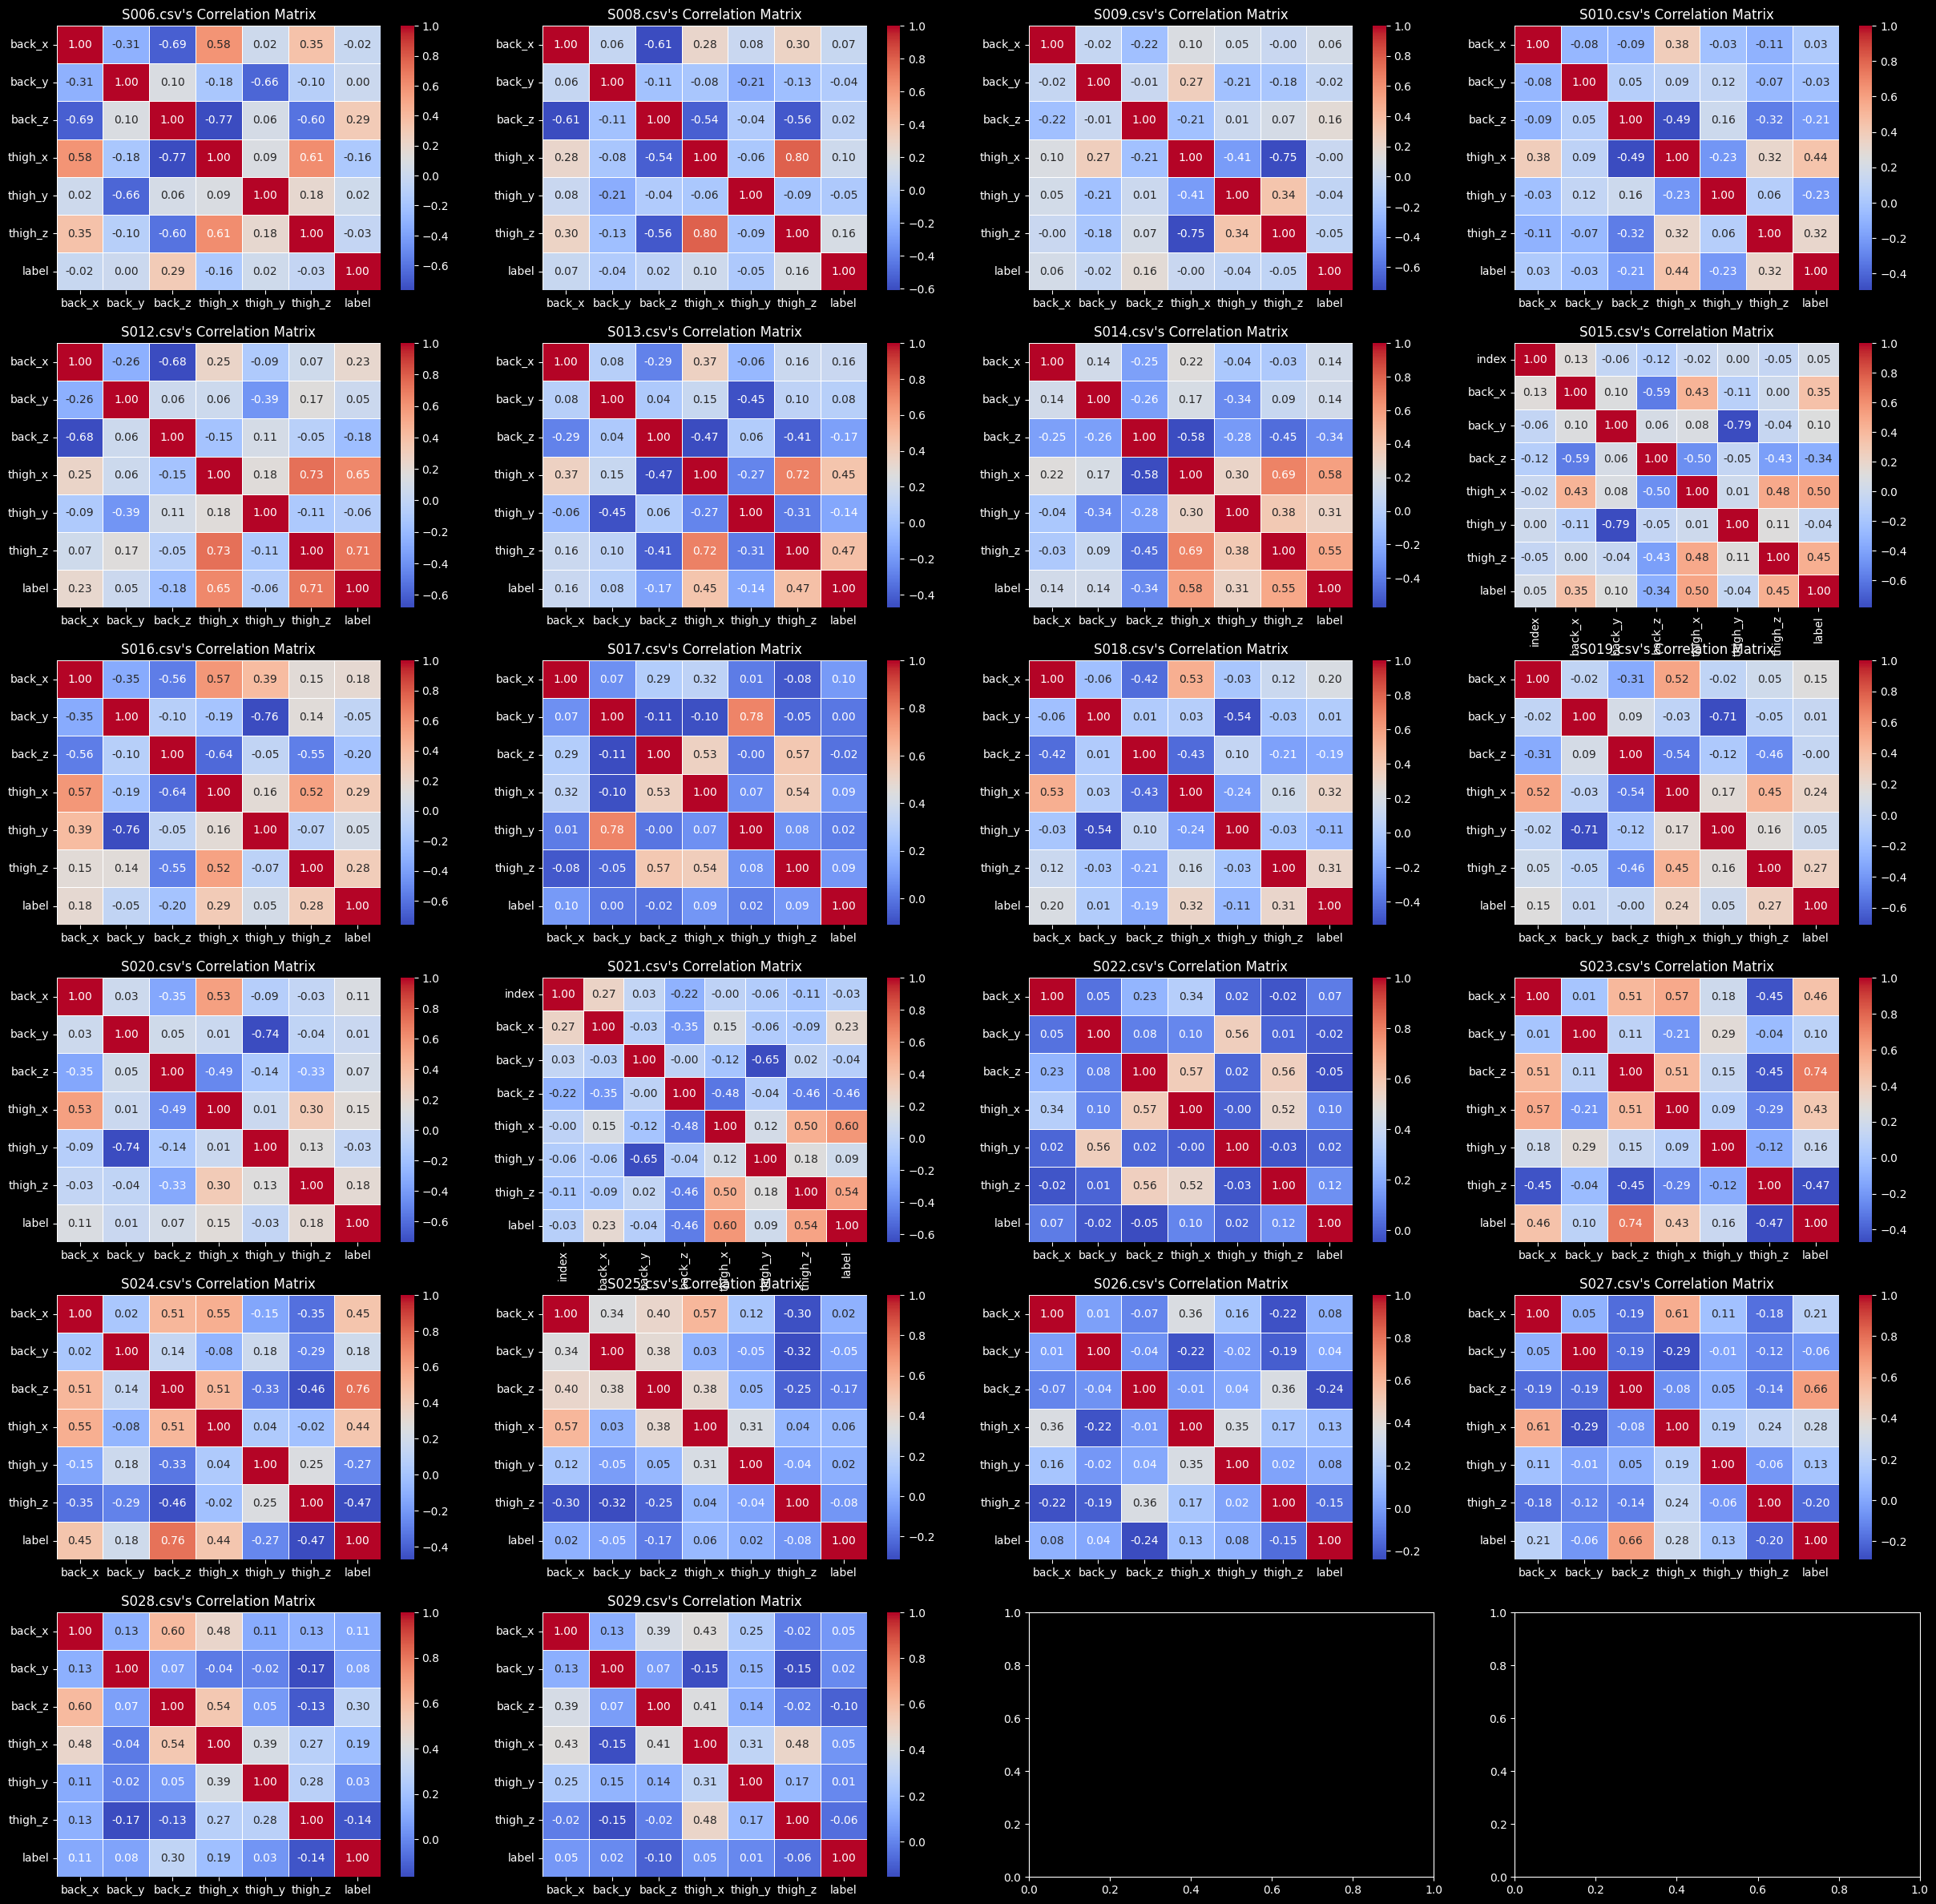

In [101]:
'''
import seaborn as sns
fig, axs = plt.subplots(6, 4, figsize=(20, 30))

# Flatten the subplot array for easier indexing

for i, column_name in enumerate(column_names):
    for index, file in enumerate(csvs):
        df = pd.read_csv(CSV_PATH + f"/{file}")
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        corr_matrix = df.corr()
        axs[i].set_title(f'Subset {i+1} Correlation Matrix')
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()'''

import seaborn as sns
fig, axs = plt.subplots(6, 4, figsize=(30, 30))#, sharex=True, sharey='row')

for index, file in enumerate(csvs):
    df = pd.read_csv(CSV_PATH + f"/{file}")
    df = df.reset_index(drop=True)
    if df.columns[0] != 'timestamp':
        df = df.iloc[:, 2:] # S023 csv has a extra index column for some reason
    else:
        df = df.iloc[:, 1:]
    corr_matrix = df.corr()
    ax = axs.flatten()[index]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
    #axs[index].set_title(f'{file}\'s Correlation Matrix')
    ax.set_title(f'{file}\'s Correlation Matrix')

plt.show()

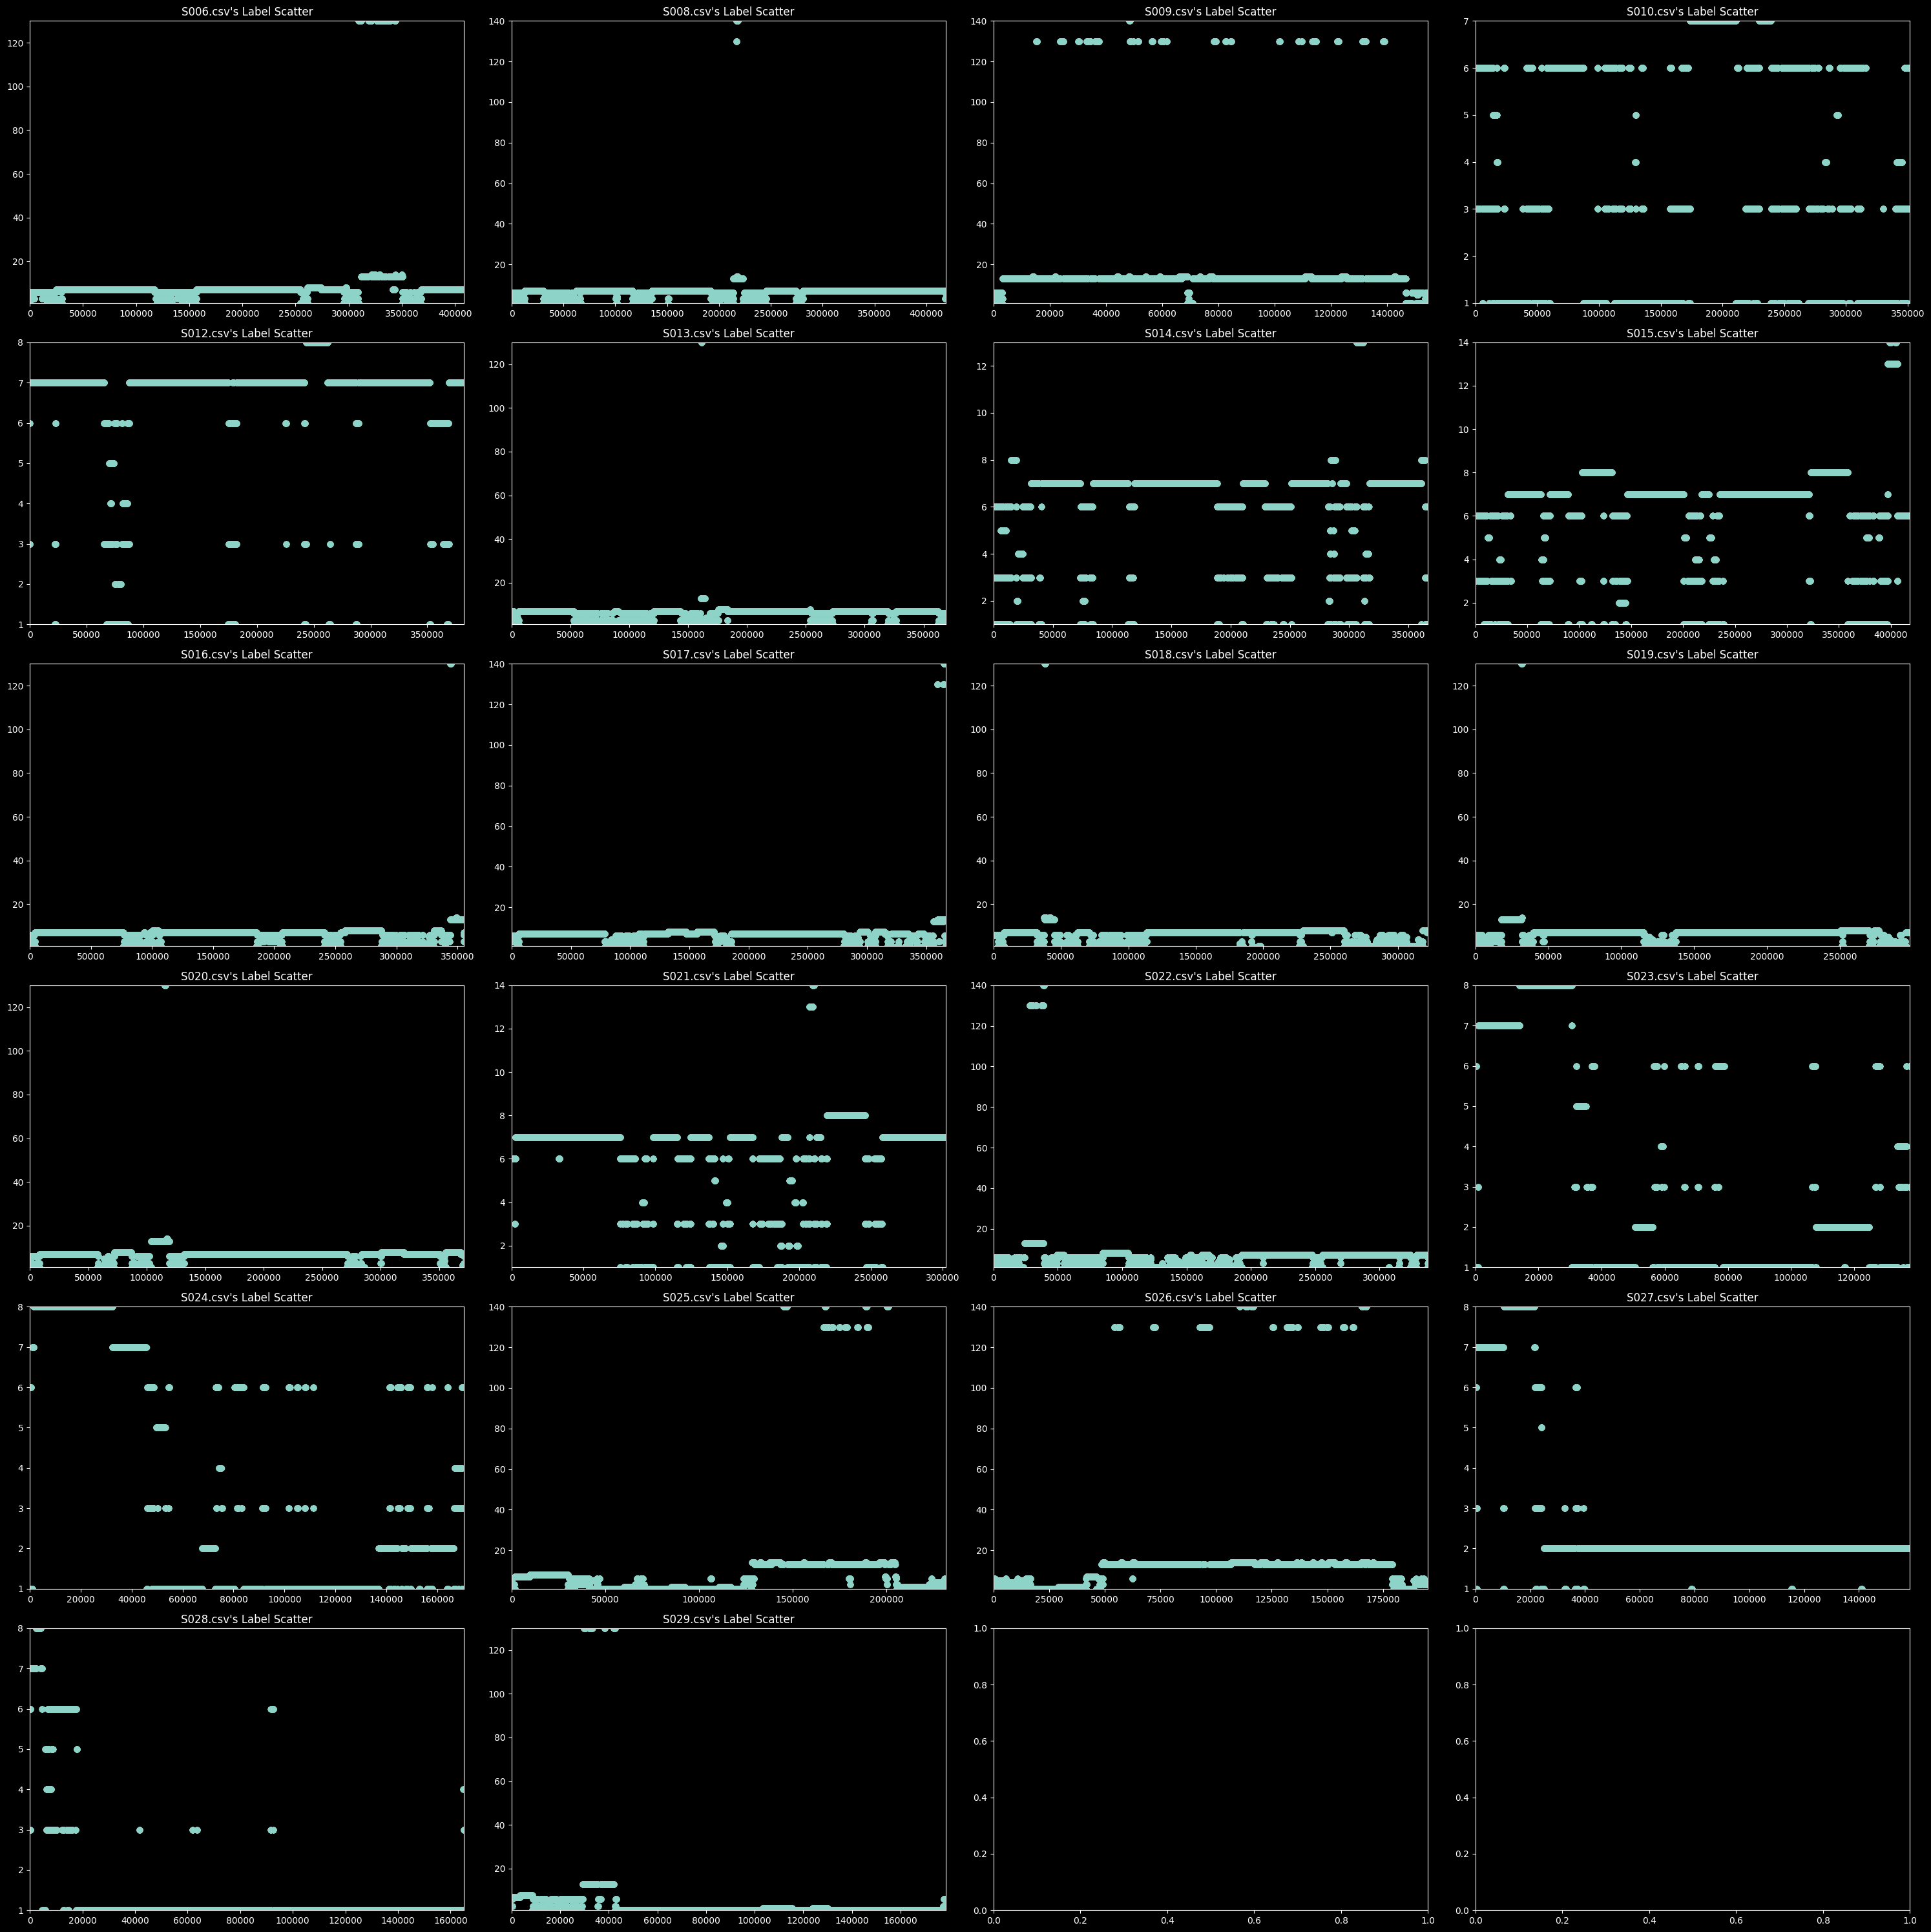

In [102]:
fig, axs = plt.subplots(6, 4, figsize=(30, 30))
for index, file in enumerate(csvs):
    df = pd.read_csv(CSV_PATH + f"/{file}")
    df = df.reset_index(drop=True)
    x_min = df.index.min()
    x_max = df.index.max()
    y_min = df['label'].min()
    y_max = df['label'].max()

    ax = axs.flatten()[index]
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    #ax.scatter(df.index, df['label'])#, df['timestamp'])
    ax.scatter(df.index, df['label'])
    ax.set_title(f'{file}\'s Label Scatter')

plt.tight_layout()
plt.show()

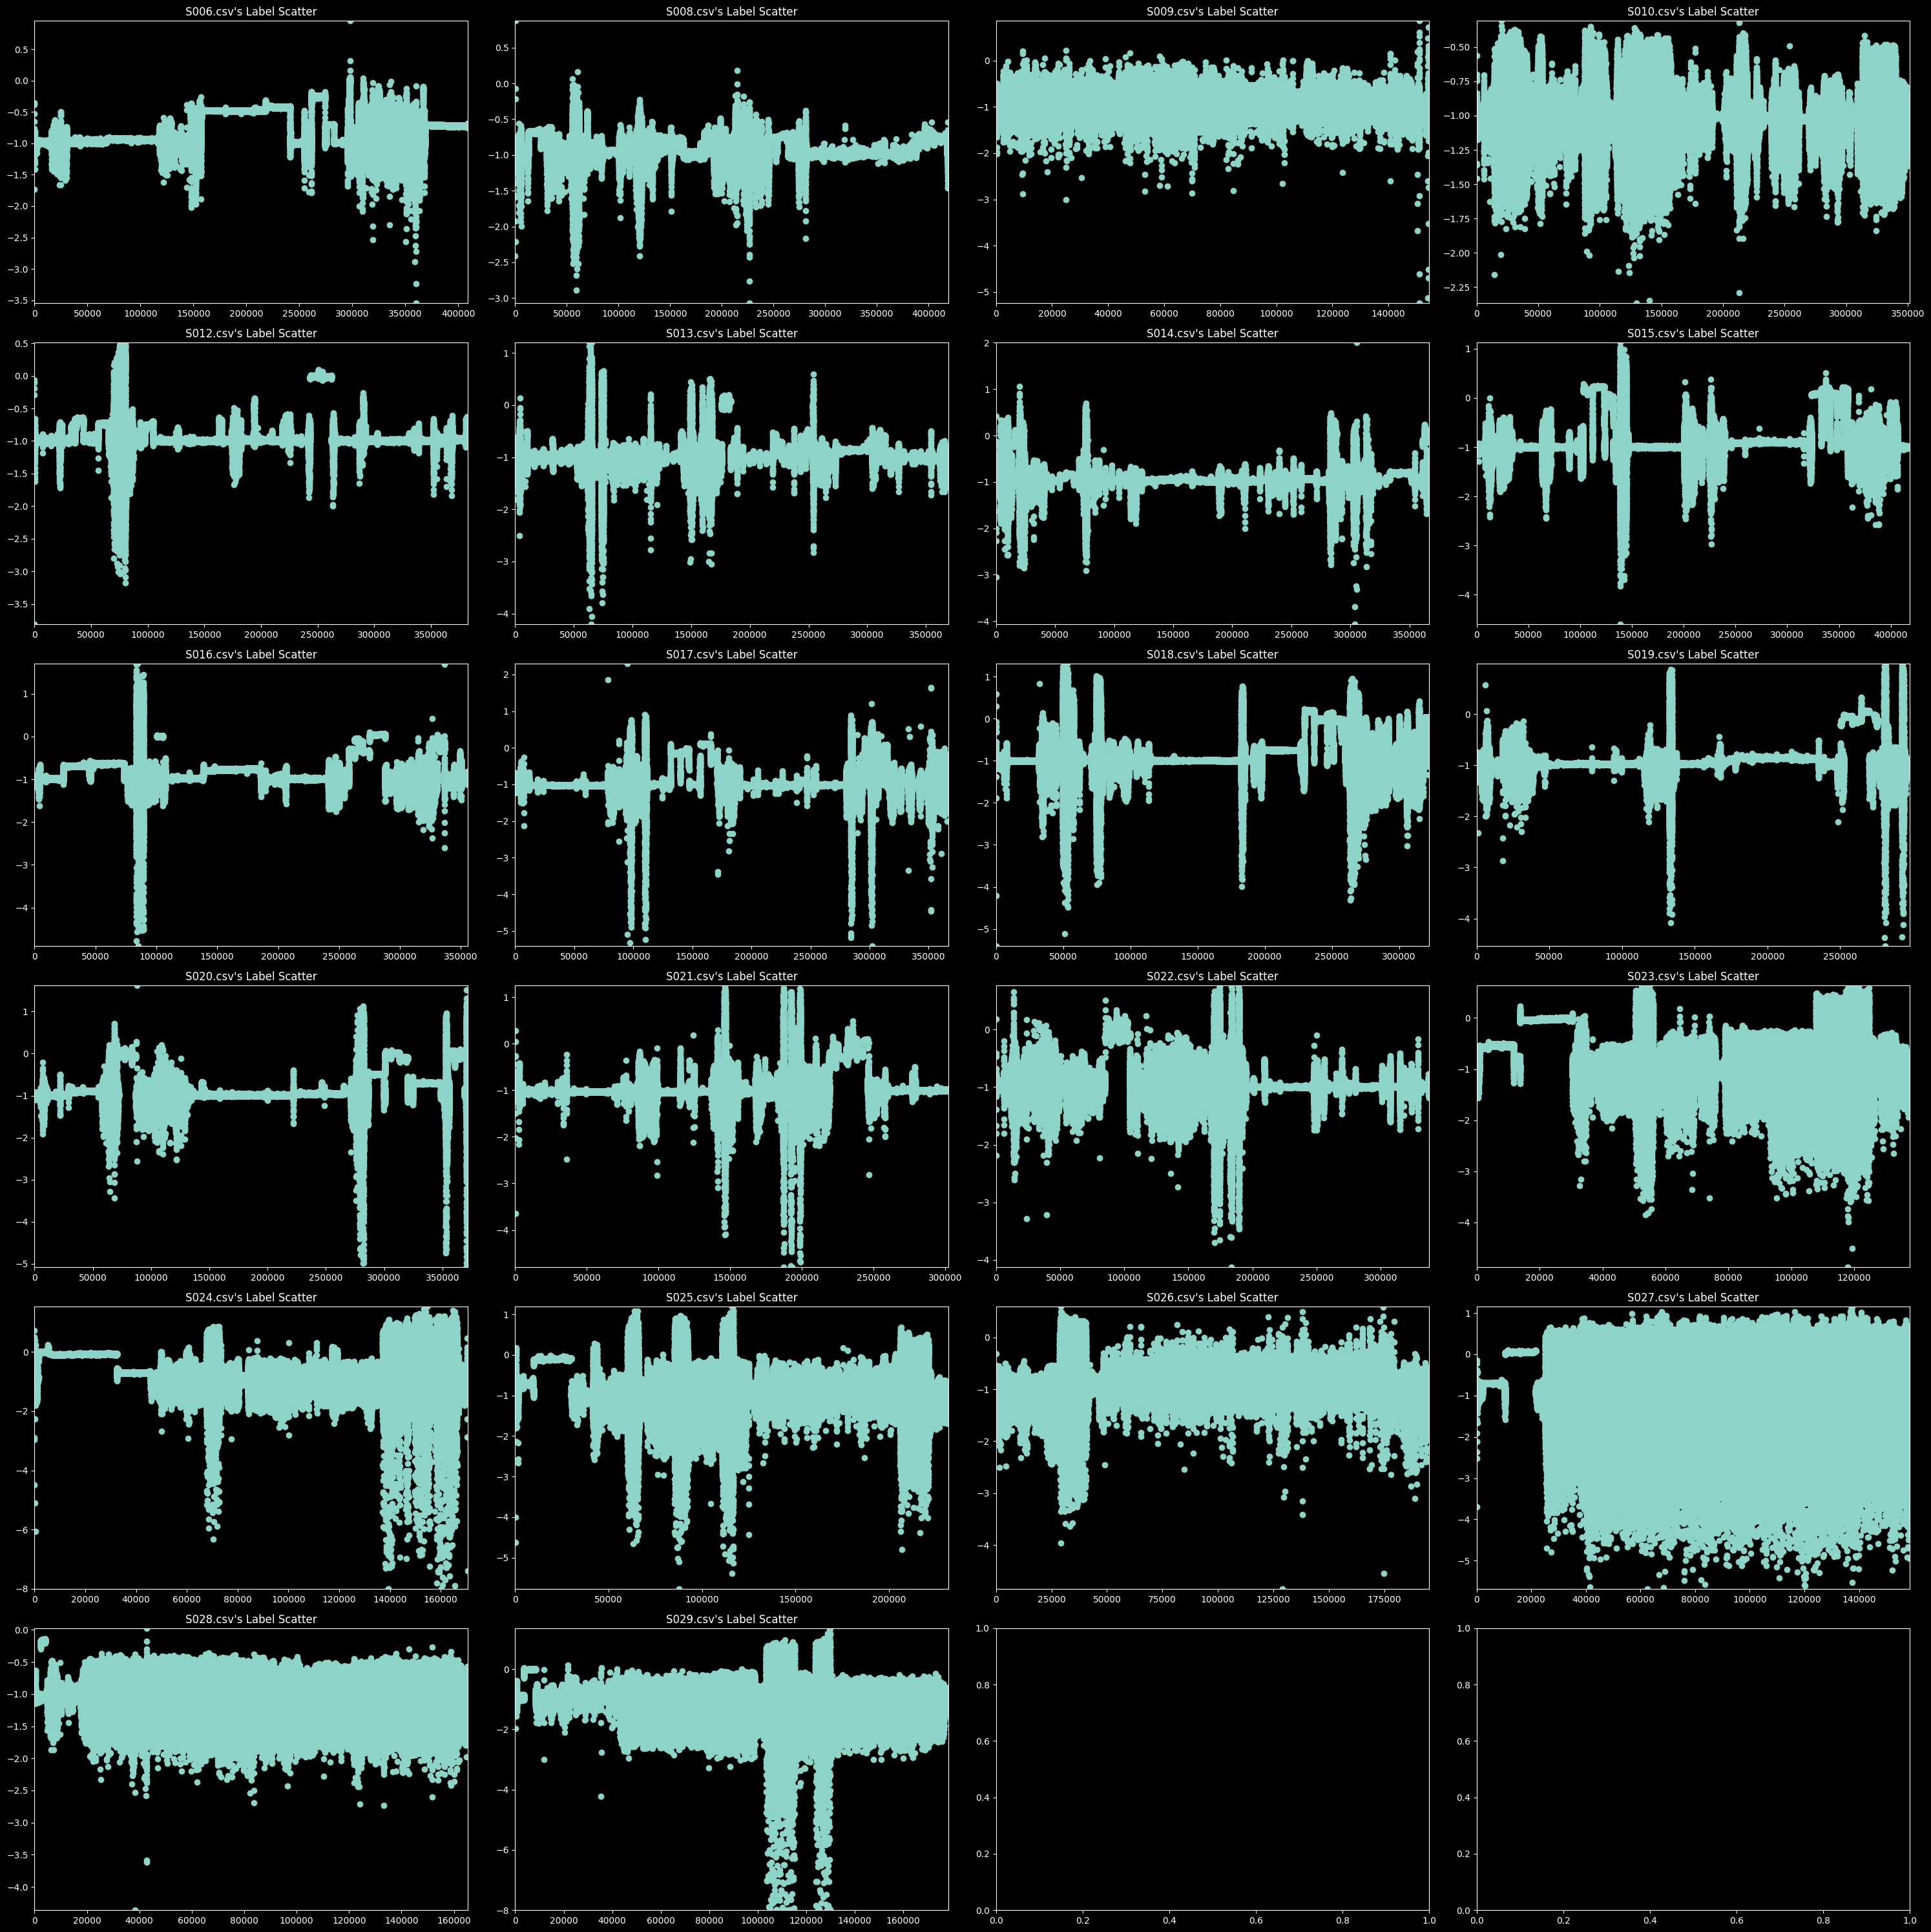

In [103]:
fig, axs = plt.subplots(6, 4, figsize=(30, 30))
for index, file in enumerate(csvs):
    df = pd.read_csv(CSV_PATH + f"/{file}")
    df = df.reset_index(drop=True)
    x_min = df.index.min()
    x_max = df.index.max()
    y_min = df['back_x'].min()
    y_max = df['back_x'].max()

    ax = axs.flatten()[index]
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    #ax.scatter(df.index, df['label'])#, df['timestamp'])
    ax.scatter(df.index, df['back_x'])
    ax.set_title(f'{file}\'s Label Scatter')

plt.tight_layout()
plt.show()

## Ερώτημα 2 - Eκπαίδευση ταξινομητών και σύγκριση των μοντέλων

### 2α) Neural Networks

In [2]:
import torch
torch.__version__

'2.3.0+cpu'

In [3]:
"""df6 = pd.read_csv(CSV_PATH + "/S006.csv") # πολλα απο 1-7
df9 = pd.read_csv(CSV_PATH + "/S009.csv") # πολλα δεδομενα cycling
df12 = pd.read_csv(CSV_PATH + "/S012.csv") # πολλα δεδομενα cycling
df13 = pd.read_csv(CSV_PATH + "/S013.csv") # σχεδον ολες τις κλασεις
df14 = pd.read_csv(CSV_PATH + "/S014.csv") # πολλα απο 1-7
df22 = pd.read_csv(CSV_PATH + "/S022.csv")
df24 = pd.read_csv(CSV_PATH + "/S024.csv")
df25 = pd.read_csv(CSV_PATH + "/S025.csv")
df26 = pd.read_csv(CSV_PATH + "/S026.csv")
df27 = pd.read_csv(CSV_PATH + "/S027.csv")

ultimate_df = pd.concat([df6, df9, df12, df13, df14, df22, df24, df25, df26, df27], axis=0)

numeric_columns = df6.select_dtypes(include=['number']).columns
print(numeric_columns)"""

'df6 = pd.read_csv(CSV_PATH + "/S006.csv") # πολλα απο 1-7\ndf9 = pd.read_csv(CSV_PATH + "/S009.csv") # πολλα δεδομενα cycling\ndf12 = pd.read_csv(CSV_PATH + "/S012.csv") # πολλα δεδομενα cycling\ndf13 = pd.read_csv(CSV_PATH + "/S013.csv") # σχεδον ολες τις κλασεις\ndf14 = pd.read_csv(CSV_PATH + "/S014.csv") # πολλα απο 1-7\ndf22 = pd.read_csv(CSV_PATH + "/S022.csv")\ndf24 = pd.read_csv(CSV_PATH + "/S024.csv")\ndf25 = pd.read_csv(CSV_PATH + "/S025.csv")\ndf26 = pd.read_csv(CSV_PATH + "/S026.csv")\ndf27 = pd.read_csv(CSV_PATH + "/S027.csv")\n\nultimate_df = pd.concat([df6, df9, df12, df13, df14, df22, df24, df25, df26, df27], axis=0)\n\nnumeric_columns = df6.select_dtypes(include=[\'number\']).columns\nprint(numeric_columns)'

In [4]:
df6 = pd.read_csv(CSV_PATH + "/S006.csv") # πολλα απο 1-7
df9 = pd.read_csv(CSV_PATH + "/S009.csv") # πολλα δεδομενα cycling
csvs2 = csvs[:]
if "S006.csv" in csvs2:
    csvs2.pop(0)
    csvs2.pop(1)
"""csvs2.remove("S015.csv")
csvs2.remove("S021.csv")
csvs2.remove("S023.csv")"""
ultimate_df = pd.concat([df6, df9])
for file in csvs2:
    new_df = pd.read_csv(CSV_PATH + f"/{file}")
    ultimate_df = pd.concat([ultimate_df , new_df], axis=0)

try:
    ultimate_df.drop(columns='index', inplace=True)
except KeyError as e:
    print(e)
print(ultimate_df.head())

numeric_columns = df6.select_dtypes(include=['number']).columns
print(numeric_columns)


                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2019-01-12 00:00:00.000 -0.760242  0.299570  0.468570 -5.092732 -0.298644   
1  2019-01-12 00:00:00.010 -0.530138  0.281880  0.319987  0.900547  0.286944   
2  2019-01-12 00:00:00.020 -1.170922  0.186353 -0.167010 -0.035442 -0.078423   
3  2019-01-12 00:00:00.030 -0.648772  0.016579 -0.054284 -1.554248 -0.950978   
4  2019-01-12 00:00:00.040 -0.355071 -0.051831 -0.113419 -0.547471  0.140903   

    thigh_z  label  Unnamed: 0  
0  0.709439      6         NaN  
1  0.340309      6         NaN  
2 -0.515212      6         NaN  
3 -0.221140      6         NaN  
4 -0.653782      6         NaN  
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')


Ορισμός του Μοντέλου μας

In [28]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

class HarthClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(HarthClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc15 = nn.Linear(hidden_size, hidden_size)
        hidden_half = hidden_size // 2
        self.fc2 = nn.Linear(hidden_size, hidden_half)
        self.fc3 = nn.Linear(hidden_half, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)

        x = self.dropout(x)

        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        x = self.relu(x)
        #return nn.functional.softmax(x, dim=1)
        return x


def train(num_epochs, model, trainloader, val_loader, lr):
    predictions = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.001)
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in trainloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            predictions.append(outputs.detach().numpy())
            
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                scheduler.step(val_loss)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
        
    predictions = np.concatenate(predictions, axis=0)
    return predictions

Ετοιμάζουμε τα datasets

In [32]:
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split

mapping = {
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    7:6,
    8:7,
    13: 8,
    14: 9,
    130: 10,
    140: 11
}

# Array splitting
array = ultimate_df[numeric_columns].values
train_size = int(0.7 * len(array))  # 70% of the data for training
val_size = int(0.15 * len(array))  # 15% of the data for validation
test_size = len(array) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(array, [train_size, val_size, test_size])


# Train set
train_dataset = np.array(train_dataset)
X_train = train_dataset[:, :-1]
y_train = train_dataset[:, -1]
X_train_T = torch.tensor(X_train, dtype=torch.float32)
y_train_T = torch.tensor([mapping.get(label, label.item()) for label in y_train], dtype=torch.long)
train_dataset_T = TensorDataset(X_train_T, y_train_T)
trainloader = DataLoader(train_dataset_T, batch_size=64, shuffle=True)

# Validation set
val_dataset = np.array(val_dataset)
X_val = val_dataset[:, :-1]
y_val = val_dataset[:, -1]
X_val_T = torch.tensor(X_val, dtype=torch.float32)
y_val_T = torch.tensor([mapping.get(label, label.item()) for label in y_val], dtype=torch.long)
val_dataset_T = TensorDataset(X_val_T, y_val_T)
val_loader = DataLoader(val_dataset_T, batch_size=64, shuffle=False)

# Test Set
test_dataset = np.array(test_dataset)
X_test = test_dataset[:, :-1]
y_test = test_dataset[:, -1]
X_test_T = torch.tensor(X_test, dtype=torch.float32)
y_test_T = torch.tensor(y_test, dtype=torch.long)
test_dataset_T = TensorDataset(X_test_T, y_test_T)
test_loader = DataLoader(test_dataset_T, batch_size=64, shuffle=False)



Εκπαιδεύουμε το Μοντέλο

In [33]:
model = HarthClassifier(input_size=6, hidden_size=10, output_size=12,  dropout_prob=0.5)
try:
    pred = train(num_epochs=10, model=model, trainloader=trainloader , val_loader=val_loader, lr=0.01)
except IndexError as e:
    print(e)

Epoch [1/10], Loss: 0.6834, Val Loss: 0.8987
Epoch [2/10], Loss: 1.0423, Val Loss: 0.8987
Epoch [3/10], Loss: 1.1082, Val Loss: 0.8987
Epoch [4/10], Loss: 0.8294, Val Loss: 0.8987
Epoch [5/10], Loss: 0.7916, Val Loss: 0.8987
Epoch [6/10], Loss: 0.7970, Val Loss: 0.8987
Epoch [7/10], Loss: 0.8131, Val Loss: 0.8987
Epoch [8/10], Loss: 0.9196, Val Loss: 0.8987
Epoch [9/10], Loss: 0.9091, Val Loss: 0.8987
Epoch [10/10], Loss: 0.9866, Val Loss: 0.8986


Αξιολόγηση του μοντέλου και Προβλέψεις σε άλλα csvs
 

In [10]:
def evaluate(df, model):  
    numeric_columns = df.select_dtypes(include=['number']).columns
    try:
        df.drop(columns=['Index'], inplace=True)
    except:
        pass
    try:
        df.drop(columns=['index'], inplace=True)
    except:
        pass
    #print(df.columns)
    new_array = df[numeric_columns].values
    X_new_array = new_array[:, :-1]
    X_new = torch.tensor(X_new_array, dtype=torch.float32)
    y_new = new_array[:, -1].astype(int)
    with torch.no_grad():
        model.eval()
        predictions = model(X_new)

    predictions_array = predictions.numpy()
    predicted_labels = np.argmax(predictions_array, axis=1) 
    reverse_mapping = {v: k for k, v in mapping.items()}
    original_labels = np.array([reverse_mapping[label] if label in reverse_mapping.keys() else label for label in predicted_labels])
    accuracy = (y_new == original_labels).mean()
    return accuracy

In [34]:
for file in csvs:
    df = pd.read_csv(CSV_PATH + f"/{file}")
    try:
        accuracy = evaluate(df=df, model=model)
    except:
        print(f'For file {file} failed')
    print(f'Accuracy for {file}: {accuracy:.4f}')

Accuracy for S006.csv: 0.8141
Accuracy for S008.csv: 0.8685
Accuracy for S009.csv: 0.0671
Accuracy for S010.csv: 0.5664
Accuracy for S012.csv: 0.9278
Accuracy for S013.csv: 0.7764
Accuracy for S014.csv: 0.8283
For file S015.csv failed
Accuracy for S015.csv: 0.8283
Accuracy for S016.csv: 0.8360
Accuracy for S017.csv: 0.8278
Accuracy for S018.csv: 0.7557
Accuracy for S019.csv: 0.8058
Accuracy for S020.csv: 0.8531
For file S021.csv failed
Accuracy for S021.csv: 0.8531
Accuracy for S022.csv: 0.7546
For file S023.csv failed
Accuracy for S023.csv: 0.7546
Accuracy for S024.csv: 0.5096
Accuracy for S025.csv: 0.3111
Accuracy for S026.csv: 0.0744
Accuracy for S027.csv: 0.2779
Accuracy for S028.csv: 0.5641
Accuracy for S029.csv: 0.5441


Δοκιμαζουμε και το Test Dataset


In [35]:
total_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        predictions = model(inputs)
        total_pred .append(predictions.detach().numpy())
    
predictions_array = np.concatenate(total_pred, axis=0)
predicted_labels = np.argmax(predictions_array, axis=1) 
reverse_mapping = {v: k for k, v in mapping.items()}
original_labels = np.array([reverse_mapping[label] if label in reverse_mapping.keys() else label for label in predicted_labels])
accuracy = (y_test == original_labels).mean()

print(f'Test Set Accuracy: {accuracy}%')

Test Set Accuracy: 0.7098307882789929%


### 2β) Random Forests


In [15]:
print()

### 2γ) Bayesian Networks

In [16]:
import pgmpy
pgmpy.__version__

'0.1.25'

In [17]:
print(ultimate_df.head())
data_bayes_train = ultimate_df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']]

                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2019-01-12 00:00:00.000 -0.760242  0.299570  0.468570 -5.092732 -0.298644   
1  2019-01-12 00:00:00.010 -0.530138  0.281880  0.319987  0.900547  0.286944   
2  2019-01-12 00:00:00.020 -1.170922  0.186353 -0.167010 -0.035442 -0.078423   
3  2019-01-12 00:00:00.030 -0.648772  0.016579 -0.054284 -1.554248 -0.950978   
4  2019-01-12 00:00:00.040 -0.355071 -0.051831 -0.113419 -0.547471  0.140903   

    thigh_z  label  Unnamed: 0  
0  0.709439      6         NaN  
1  0.340309      6         NaN  
2 -0.515212      6         NaN  
3 -0.221140      6         NaN  
4 -0.653782      6         NaN  


In [18]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

#print(ultimate_df.head())
# ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']
bayesian = BayesianNetwork([('back_x', 'label'), 
                            #('back_y', 'label'), 
                            #('back_z', 'label'), 
                            ('thigh_x', 'label'),
                            #('thigh_y', 'label'),
                            #('thigh_z', 'label'), 
                            ('back_x', 'back_z'),
                            ('back_y', 'back_z'),
                            ('back_x', 'back_y'),
                            ('thigh_x', 'thigh_z'),
                            ('thigh_y', 'thigh_z'),
                            ('thigh_x', 'thigh_y')])

# Step 3: Perform inference to make predictions on new data
inference = VariableElimination(bayesian)

bayesian.fit(data_bayes_train, estimator=MaximumLikelihoodEstimator)


ValueError: No CPD associated with back_x

In [ ]:
for index, row in data_bayes_train.iterrows():
    query = inference.map_query(variables=['Class'], evidence={'Feature1': row['Feature1'], 'Feature2': row['Feature2']})
    print(f"Prediction for instance {index+1}: Class {query['Class']}")

In [ ]:
correct_predictions = 0
total_instances = len(data_bayes_train)


# Predict the class label for each instance in the new data and compare with the ground truth
for index, row in data_bayes_train.iterrows():
    query = inference.map_query(variables=['Class'], evidence={'Feature1': row['Feature1'], 'Feature2': row['Feature2']})
    predicted_class = query['Class']
    true_class = true_labels[index]
    if predicted_class == true_class:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_instances
print(f"Accuracy: {accuracy * 100:.2f}%")

## Ερώτημα 3 - Συσταδοποίηση και μετασχηματισμός του συνόλου δεδομένων

In [ ]:
print()